In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# The dataset for this analysis is taken from:
# https://www.kaggle.com/andonians/random-linear-regression
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# There is one value for which y value is not present. Since it is only one, it can be removed
train = train.dropna()
test = test.dropna()

In [73]:
# Scale / normalize the train and test dataframes
max_value = train['x'].max()
min_value = train['x'].min()
train_scaled = pd.DataFrame()
train_scaled['x'] = (train['x'] - min_value) / (max_value - min_value)
train_scaled['y'] = train['y']
test_scaled = pd.DataFrame()
test_scaled['x'] = (test['x'] - min_value) / (max_value - min_value)
test_scaled['y'] = test['y']

In [74]:
def prepare_matrices(dataframe):
    '''
    This function prepares x matrix (by adding a dummy feature, x0) and y matrix.
    
    Arguements:
    dataframe: Dataframe (train / test), the last row of which is 'y'
    
    Returns:
    x: numpy matrix of shape (m, n), m = number of train / test set examples
        n = number of features (# of feature columns of dataframe + 1)
    y = numpy matrix of shape (m, 1), m = number of train / test set examples
    '''
    m = len(dataframe)
    y = dataframe['y'].to_numpy()
    y = y.reshape((m, 1))
    x_dataframe = dataframe.drop('y', axis = 1)
    x_1 = x_dataframe.to_numpy()
    x_0 = np.ones(shape = (m, 1))
    x = np.concatenate((x_0, x_1), axis = 1)
    return x, y

In [75]:
def initialize_parameter_matrix(n, method = 'zeros'):
    '''
    This function initializes parameter matrix.
    
    Arguements:
    n: Number of features (This include dummy featue x0)
    method: zeros / random. The method used to initialize paramter matrix.
    (default: 'zeros', i.e. initialization with zeros)
    
    Returns:
    theta: Parameter matrix of shape (n, 1), n = number of features 
    '''
    if method == 'zeros':
        theta = np.zeros(shape = (n, 1))
    elif method == 'random':
        theta = np.random.rand(n, 1)
    
    return theta

In [76]:
def hypothesis_calc(theta, x):
    '''
    This function calculates hypothesis matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1), n = number of features
    x: Feature matrix of shape (m, n), m = number of training examples
    
    Returns:
    h: Calculated hypothesis matrix of shape (m, 1)
    '''
    h = np.sum(np.transpose(theta) * x, axis = 1)
    m = x.shape[0]
    h = h.reshape((m, 1))
    return h

In [77]:
def cost_calc(h, y):
    '''
    This function calculates cost.
    
    Arguements:
    h: Hypothesis matrix of shape (m, 1), m = number of training examples
    y: Output matrix of shape (m, 1)
    
    Returns:
    cost: Calculated cost based on hypothesis (h) and output matrix (y)
    '''
    cost = 0.5 * np.nansum(np.square((h-y)))
    return cost

In [78]:
def update_gradients(y, h, x, theta, learning_rate):
    '''
    This function updates parameter matrix using gradient descent algorithm.
    
    Arguements:
    y: Output matrix of shape (m, 1), m = number of training examples
    h: Hypothesis matrix of shape (m, 1)
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    theta: Parameter matrix of shape (n, 1)
    learning_rate: Value of learning rate to be used to update parameter matrix
    
    Returns:
    theta: Updated parameter matrix of shape (n, 1)
    '''    
    int_term = np.nansum(np.multiply((y - h), x), axis = 0)
    n = x.shape[1]
    int_term = int_term.reshape((n,1))
    theta = theta + (learning_rate * int_term)
    return theta

In [79]:
def convergence_check(costs, epsilon):
    '''
    This function checks convergence of gradient descent algorithm.
    
    Arguements:
    costs: A list containing cost values of current and previous iterations
    epsilon: Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm
    
    Returns:
    Boolean (True / False) value of whether algorithm has been converged
    '''
    error = (costs[0] - costs[1]) ** 2
    return error < epsilon

In [80]:
def linear_regression_grad_descent(x, y, num_iterations = 10000, learning_rate = 0.01, epsilon = 1e-09):
    '''
    This function performs linear regression using gradient descent algorithm for minimising cost.
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    num_iterations (optional): Max number of iterations (default value: 100) (if convergence is acheived before this number,
    algorithm will be stopped)
    learning_rate (optional): Value for learning rate (default value: 0.000000001)
    epsilon (optional): Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm (default value = 1e-08)
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    costs: A dictionary with learning rate as key and list of costs for each iteration as value
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    n = x.shape[1]
    theta = initialize_parameter_matrix(n)
    print('Initial Parameters:')
    h = hypothesis_calc(theta, x)
    cost = cost_calc(h, y)
    print('Cost:', cost)
    print('Parameter 1:', theta[0][0])
    print('Parameter 2:', theta[1][0])
    print('*************************************')
    costs = {}
    costs_list = []
    for i in range(num_iterations):
        print('Iteration:', i+1)
        h = hypothesis_calc(theta, x)
        theta = update_gradients(y, h, x, theta, learning_rate)
        cost = cost_calc(h, y)
        print('Cost:', cost)
        print('Parameter 1:', theta[0][0])
        print('Parameter 2:', theta[1][0])
        print('*************************************')
        costs_list.append(cost)
        if i > 1:
            if convergence_check(costs_list[-2:], epsilon):
                print('Alogorithm has converged')
                break
    costs[learning_rate] = costs_list
    return theta, costs

In [81]:
def linear_regression_normal_eq(x, y):
    '''
    This function performs linear regression using normal equation
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    matrix_1 = np.linalg.inv(np.matmul(np.transpose(x), x))
    matrix_2 = np.matmul(matrix_1, np.transpose(x))
    return np.matmul(matrix_2, y)

In [82]:
def y_calc(theta, x):
    '''
    This function calculates output (y) using parameters (theta) and feature matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1)
    x: Feature matrix of shape (m, n), m = number of training / test set examples
    
    Returns:
    y: Output / label matrix of shape (m, 1)
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    y = np.sum(np.multiply(np.transpose(theta), x), axis = 1)
    m = x.shape[0]
    y = y.reshape((m, 1))
    return y

In [83]:
def r_square_calc(y, y_pred):
    '''
    This function calculates r-square value of the linear regression model.
    
    Arguements:
    y: Output / label matrix of shape (m, 1), m = number of train / test set examples
    y_pred: Output matrix predicted by linear regression algorithm of shape (m, 1)
    
    Returns:
    r_squared_value: r_squared_value of the linear regression model rounded to 3 digits (between 0 and 1)
    
    '''
    y_mean = np.mean(y)
    ss_total = np.sum(np.square(y - y_mean))
    ss_res = np.sum(np.square(y - y_pred))
    return round((1 - (ss_res / ss_total)), 5)

In [84]:
x_train, y_train = prepare_matrices(train_scaled)
x_test, y_test = prepare_matrices(test_scaled)
theta_grad_descent, costs = linear_regression_grad_descent(x_train, y_train, learning_rate=0.001)

Initial Parameters:
Cost: 1167373.6267494461
Parameter 1: 0.0
Parameter 2: 0.0
*************************************
Iteration: 1
Cost: 1167373.6267494461
Parameter 1: 34.90796855014998
Parameter 2: 23.314617845784582
*************************************
Iteration: 2
Cost: 179078.4846850767
Parameter 1: 37.264476684858856
Parameter 2: 28.984524149001665
*************************************
Iteration: 3
Cost: 151740.5426612363
Parameter 1: 35.99158638980153
Parameter 2: 32.50742051415536
*************************************
Iteration: 4
Cost: 138156.21557323594
Parameter 1: 34.37684184173155
Parameter 2: 35.65318804751791
*************************************
Iteration: 5
Cost: 125943.10428679024
Parameter 1: 32.79104340309893
Parameter 2: 38.62934879715997
*************************************
Iteration: 6
Cost: 114833.28557365305
Parameter 1: 31.273252274995656
Parameter 2: 41.46536399912552
*************************************
Iteration: 7
Cost: 104725.3946424319
Parameter 1: 29.

Iteration: 196
Cost: 2749.781362408232
Parameter 1: -0.10330860174610719
Parameter 2: 100.05824913058552
*************************************
Iteration: 197
Cost: 2749.781201699396
Parameter 1: -0.10349123502827676
Parameter 2: 100.05859018043405
*************************************
Iteration: 198
Cost: 2749.7810554835696
Parameter 1: -0.10366543867325667
Parameter 2: 100.05891548875697
*************************************
Iteration: 199
Cost: 2749.7809224537477
Parameter 1: -0.10383160176008571
Parameter 2: 100.05922578212147
*************************************
Iteration: 200
Cost: 2749.780801420792
Parameter 1: -0.10399009540945157
Parameter 2: 100.05952175355925
*************************************
Iteration: 201
Cost: 2749.7806913028044
Parameter 1: -0.10414127361255884
Parameter 2: 100.05980406411435
*************************************
Iteration: 202
Cost: 2749.7805911154546
Parameter 1: -0.10428547402175527
Parameter 2: 100.06007334431963
*********************************

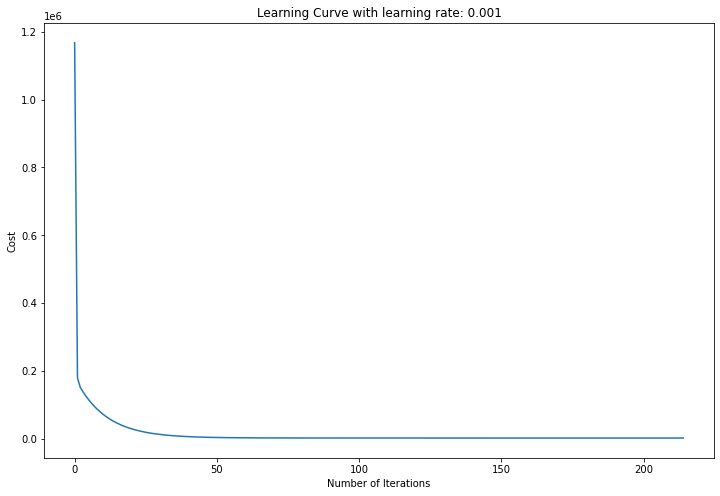

In [85]:
# Plot the learning curve
learning_rate = list(costs.keys())[0]
cost_list = costs[learning_rate]
plt.figure(figsize = (12, 8))
plt.plot(cost_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve with learning rate: {}'.format(learning_rate));

In [86]:
y_train_pred = y_calc(theta_grad_descent, x_train)
y_test_pred = y_calc(theta_grad_descent, x_test)
train_r_square = r_square_calc(y_train, y_train_pred)
test_r_square = r_square_calc(y_test, y_test_pred)
print('Summary of Linear Regression with Gradient Descent Algorithm:')
print('Train R-square:{}'.format(train_r_square))
print('Test R-square:{}'.format(test_r_square))
print('Cost at convergence:{}'.format(cost_list[-1]))
print('Parameter 1:{}'.format(theta_grad_descent[0][0]))
print('Parameter 2:{}'.format(theta_grad_descent[1][0]))

Summary of Linear Regression with Gradient Descent Algorithm:
Train R-square:0.9907
Test R-square:0.9888
Cost at convergence:2749.779876195281
Parameter 1:-0.10565326055426699
Parameter 2:100.06262755231604


In [87]:
# Linear regression with Normal equation
theta_normal_eq = linear_regression_normal_eq(x_train, y_train)
y_train_pred_norm = y_calc(theta_normal_eq, x_train)
y_test_pred_norm = y_calc(theta_normal_eq, x_test)
train_r_square_norm = r_square_calc(y_train, y_train_pred_norm)
test_r_square_norm = r_square_calc(y_test, y_test_pred_norm)
print('Summary of Linear Regression with Normal Equation:')
print('Train R-square:{}'.format(train_r_square_norm))
print('Test R-square:{}'.format(test_r_square_norm))
h_norm = hypothesis_calc(theta_normal_eq, x_train)
cost_norm = cost_calc(h_norm, y_train)
print('Cost:{}'.format(cost_norm))
print('Parameter 1:{}'.format(theta_normal_eq[0][0]))
print('Parameter 2:{}'.format(theta_normal_eq[1][0]))

Summary of Linear Regression with Normal Equation:
Train R-square:0.9907
Test R-square:0.9888
Cost:2749.7795803539466
Parameter 1:-0.10726546430082973
Parameter 2:100.06563818563009


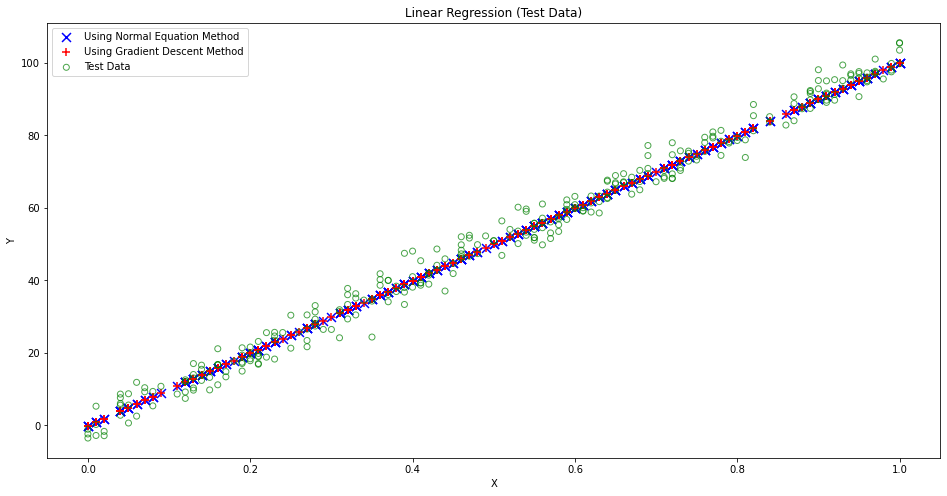

In [88]:
# Plotting of test data
plt.figure(figsize = (16, 8))
plt.scatter(x_test[:,1], y_test_pred_norm, label = 'Using Normal Equation Method', marker = 'x', s = 80, color = 'blue')
plt.scatter(x_test[:,1], y_test_pred, label = 'Using Gradient Descent Method', marker = '+', s = 80, color = 'red')
plt.scatter(x_test[:,1], y_test, label = 'Test Data', facecolors = 'none', edgecolors = 'green', alpha = 0.7)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (Test Data)');

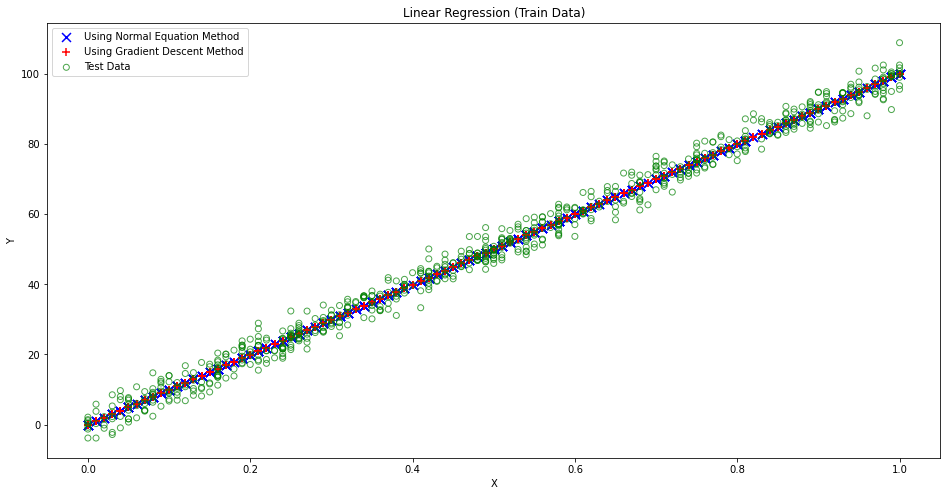

In [89]:
# Plotting of train data
plt.figure(figsize = (16, 8))
plt.scatter(x_train[:,1], y_train_pred_norm, label = 'Using Normal Equation Method', marker = 'x', s = 80, color = 'blue')
plt.scatter(x_train[:,1], y_train_pred, label = 'Using Gradient Descent Method', marker = '+', s = 80, color = 'red')
plt.scatter(x_train[:,1], y_train, label = 'Test Data', facecolors = 'none', edgecolors = 'green', alpha = 0.7)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (Train Data)');